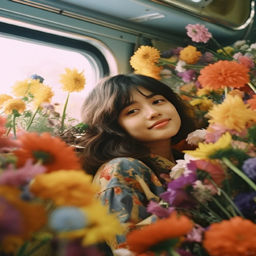

In [2]:
import ptwt, pywt, torch
import numpy as np
from PIL import Image

image = "/data/huangrenyuan/projects/InstantStyle/assets/3.jpg"
image = Image.open(image)
image = image.resize((256, 256))
image

In [34]:
image = np.array(image)
face = np.transpose(image, [2, 0, 1]).astype(np.float64)
pytorch_face = torch.tensor(face, requires_grad=True).unsqueeze(0)

In [3]:
test_input = torch.randn(6, 64, 128, 128)
test_coefficients = ptwt.wavedec2(test_input, pywt.Wavelet("haar"),
                                level=1, mode="symmetric")
print(test_coefficients[0].shape, test_coefficients[1][0].shape)

torch.Size([6, 64, 64, 64]) torch.Size([6, 64, 64, 64])


In [41]:
coefficients = ptwt.wavedec2(pytorch_face, pywt.Wavelet("haar"),
                                level=1, mode="symmetric")
print(len(coefficients), coefficients[0].shape, coefficients[0].requires_grad)
print(len(coefficients[1]), coefficients[1][0].shape)

2 torch.Size([1, 3, 128, 128]) True
3 torch.Size([1, 3, 128, 128])


In [46]:
reconstruction = ptwt.waverec2(coefficients, pywt.Wavelet("haar"))
np.max(np.abs(face - reconstruction.squeeze(1).detach().numpy()))

1.4210854715202004e-13

In [58]:
low_res = coefficients[0].detach().squeeze(0)
print(low_res[0].min(), low_res[0].max())
print(low_res[1].min(), low_res[1].max())
print(low_res[2].min(), low_res[2].max())

tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)


In [57]:
for i in range(3):
    c = low_res[i]
    print(c.min(), c.max())
    low_res[i] = (c-c.min())/(c.max()-c.min())

tensor(33.5000, dtype=torch.float64) tensor(507.0000, dtype=torch.float64)
tensor(28.5000, dtype=torch.float64) tensor(474.5000, dtype=torch.float64)
tensor(8.5000, dtype=torch.float64) tensor(496.0000, dtype=torch.float64)


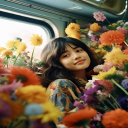

In [59]:
ll = low_res
ll = ll*255
numpy_ll = ll.numpy()
image_ll = np.transpose(numpy_ll, [1, 2, 0]).astype(np.uint8)
image_ll = Image.fromarray(image_ll)
image_ll


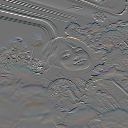

In [33]:
lh = coefficients[1][0]
lh = (lh - lh.min()) / (lh.max() - lh.min())
lh = lh*255
numpy_lh = lh.numpy()
image_lh = np.transpose(numpy_lh, [1, 2, 0]).astype(np.uint8)
image_lh = Image.fromarray(image_lh)
image_lh